## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize, FunctionTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ha_1.csv")
df = df.dropna()
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
X = df[["age", "chol"]]
y = df["diagnosis"]

In [4]:
logreg_pipeline1 = Pipeline(
  [#("preprocessing", ct1),
  ("logreg", LogisticRegression(max_iter=1000))]
).set_output(transform="pandas")

logreg1 = cross_val_score(logreg_pipeline1, X, y, scoring="roc_auc", cv=5).mean()
print(logreg1)

#COEFFICIENTS
# Fit the model
logreg_pipeline1.fit(X, y)

# Get feature names after preprocessing
preprocessed_feature_names = logreg_pipeline1.named_steps["logreg"].feature_names_in_

# Get coefficients from Logistic Regression
coefficients = logreg_pipeline1.named_steps["logreg"].coef_[0]

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    "Feature": preprocessed_feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Display coefficients
print(coefficients_df)

#Intercept
intercept = logreg_pipeline1.named_steps["logreg"].intercept_[0]
print(intercept)

0.6349815288434215
  Feature  Coefficient
0     age     0.046863
1    chol     0.001801
-3.2401122588588933


In [5]:
#How high for the doctors to estimate a 90% chance that heart disease is present?
logit_p = np.log(.9 / (1 - .9))
(logit_p - intercept - (.04686331 * 55)) / .00180124

1587.714455705577

In [6]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
#When age is 55
logit_p = np.log(.5 / (1 - .5))
log55 = (logit_p - intercept - (.04686331 * 55)) / .00180124
log55

367.87446917617496

In [7]:
#When age is 80
log80 = (logit_p - intercept - (.04686331 * 80)) / .00180124

In [8]:
#When age is 20
log20 = (logit_p - intercept - (.04686331 * 20)) / .00180124
log20

1278.4781921670035

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
lda_pipeline1 = Pipeline(
  [#("preprocessing", ct1),
  ("lda", LinearDiscriminantAnalysis())]
).set_output(transform="pandas")

lda_pipeline1.fit(X, y)

#Coefficients
coefficients = lda_pipeline1.named_steps["lda"].coef_[0]
intercept = lda_pipeline1.named_steps["lda"].intercept_[0]

#Extract individual coefficients
beta_age = coefficients[0]
beta_chol = coefficients[1]

beta_age, beta_chol, intercept

#Equation
#Intercept + Beta(age) * age + Beta(chol) * CHOL = 0
#-3.22 + 0.0466





(0.04655743553694484, 0.0017896671039291314, -3.2196776604068784)

In [11]:
age = 55
lda55 = -(beta_age * age + intercept) / beta_chol
lda55

368.235357529938

In [12]:
age = 20
lda20 = -(beta_age * age + intercept) / beta_chol
lda20

1278.7456084115433

In [13]:
age = 80
lda80 = -(beta_age * age + intercept) / beta_chol

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [14]:
import sklearn.svm as svm

svc_pipeline1 = Pipeline(
  [#("preprocessing", ct1),
  ("svc", svm.SVC(kernel="linear"))]
).set_output(transform="pandas")

svc_pipeline1.fit(X, y)

#tune the regularization parameter
param_grid = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(svc_pipeline1, param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#Coefficients
coefficients = svc_pipeline1.named_steps["svc"].coef_[0]
intercept = svc_pipeline1.named_steps["svc"].intercept_[0]

#Extract individual coefficients
beta_age = coefficients[0]
beta_chol = coefficients[1]

age = 55

-(beta_age * age + intercept) / beta_chol

Best Parameters: {'svc__C': 1}


312.7005277830234

In [15]:
svc_pipeline2 = Pipeline(
  [#("preprocessing", ct1),
  ("svc", svm.SVC(kernel="linear", C=1))]
).set_output(transform="pandas")

svc_pipeline2.fit(X, y)

#intercepts
intercept = svc_pipeline2.named_steps["svc"].intercept_[0]

#coefficients
coefficients = svc_pipeline2.named_steps["svc"].coef_[0]
beta_age = coefficients[0]
beta_chol = coefficients[1]

beta_age, beta_chol, intercept

print(beta_age)
print(beta_chol)
print(intercept)

age = 55

svc55 = -(beta_age * age + intercept) / beta_chol



0.06439772419707879
0.0036589616029232275
-4.686034055211244


In [16]:
age = 20

svc20 = -(beta_age * age + intercept) / beta_chol

In [17]:
age = 80

svc80 = -(beta_age * age + intercept) / beta_chol

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [18]:
#Create a dataframe for age 20, 55, and 80
df_logistic = []
df_logistic.append({"Age": 20, "Chol": log20})
df_logistic.append({"Age": 55, "Chol": log55})
df_logistic.append({"Age": 80, "Chol": log80})

df_logistic = pd.DataFrame(df_logistic)

df_lda = []
df_lda.append({"Age": 20, "Chol": lda20})
df_lda.append({"Age": 55, "Chol": lda55})
df_lda.append({"Age": 80, "Chol": lda80})

df_lda = pd.DataFrame(df_lda)

df_svc = []
df_svc.append({"Age": 20, "Chol": svc20})
df_svc.append({"Age": 55, "Chol": svc55})
df_svc.append({"Age": 80, "Chol": svc80})

df_svc = pd.DataFrame(df_svc)


In [19]:
df_logistic

,Age,Chol
0,20,1278.478192
1,55,367.874469
2,80,-282.556762


In [20]:
df_lda

,Age,Chol
0,20,1278.745608
1,55,368.235358
2,80,-282.129107


In [21]:
df_svc

,Age,Chol
0,20,928.700528
1,55,312.700528
2,80,-127.299472


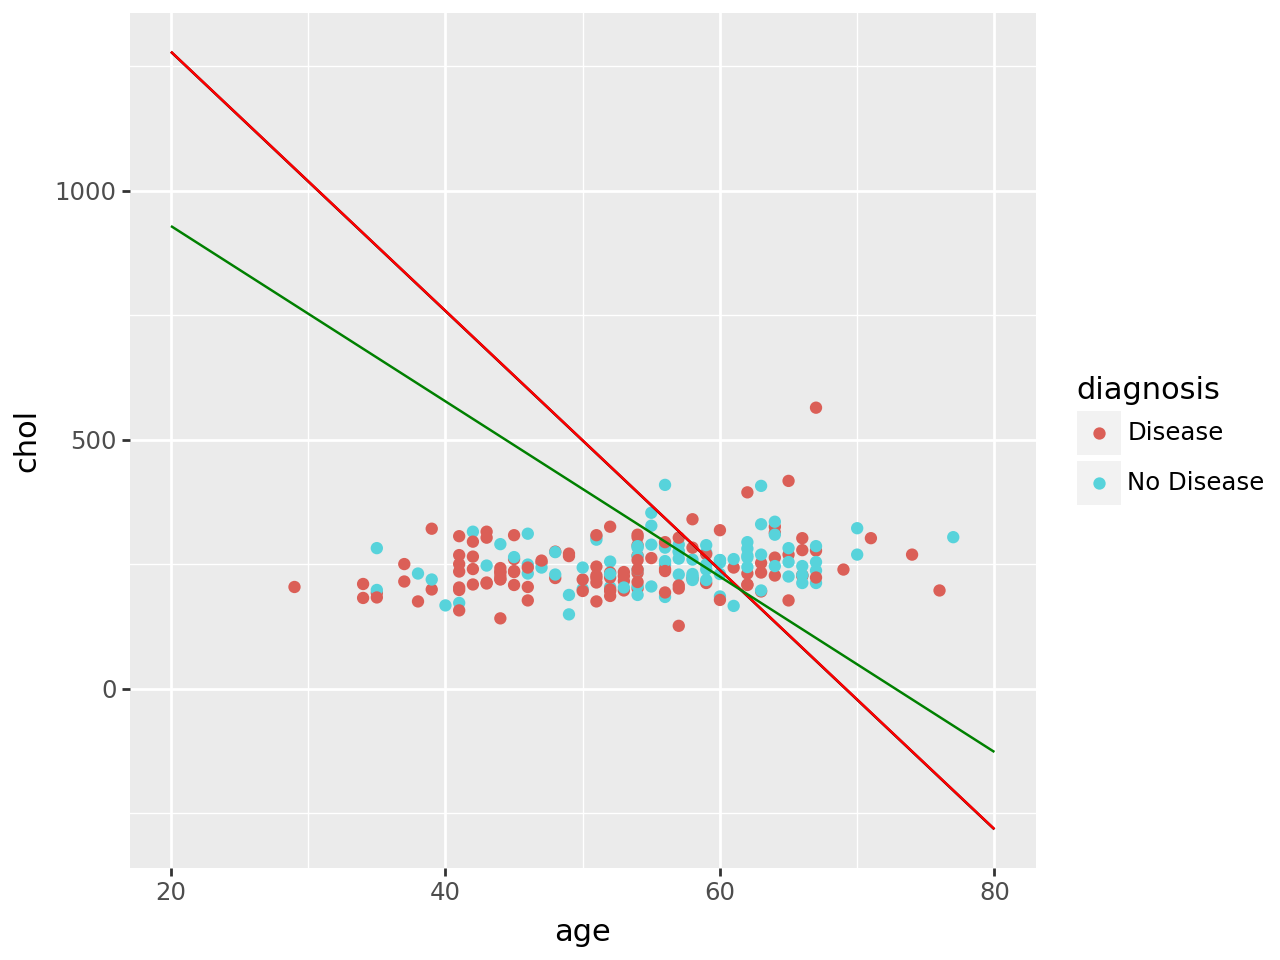

In [22]:
from plotnine import ggplot, aes, geom_point, geom_line

(
    ggplot(df, aes(x="age", y="chol", color="diagnosis"))
    + geom_point()  # Scatterplot of the main data
    + geom_line(aes(x="Age", y="Chol"), data=df_logistic, color="black")
    + geom_line(aes(x="Age", y="Chol"), data=df_lda, color="red")
    + geom_line(aes(x="Age", y="Chol"), data=df_svc, color="green")
)
